<a href="https://colab.research.google.com/github/rezkydp/Percobaan-Ke-2/blob/main/Gaussian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 7 Frequency Domain Filter Gaussian Filter.py

In [35]:
# libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

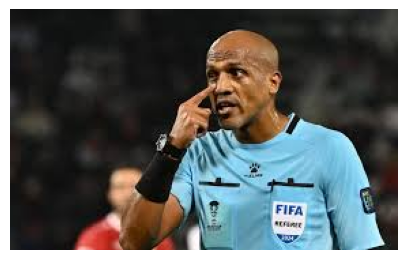

In [36]:
# open the image f
Rezky = cv2.imread('Wasit_Botak.jpg')

#Convert BGR to RGB
Rezky1 = cv2.cvtColor(Rezky, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5,5))
plt.imshow(Rezky1)
plt.axis('off')
plt.show()

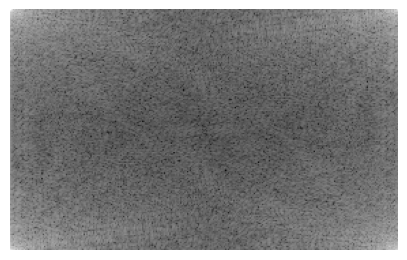

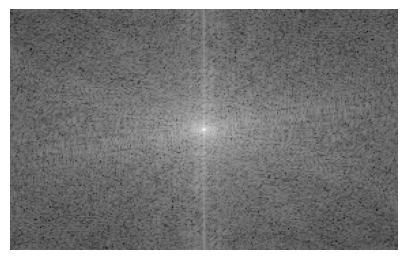

In [37]:
# transform the image into frequency domain, f --> F
F = np.fft.fft2(f)
Fshift = np.fft.fftshift(F)

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(F)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')
plt.axis('off')
plt.show()

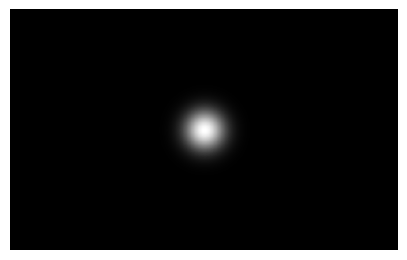

In [38]:
# Create Gaussin Filter: Low Pass Filter
M,N = f.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 10
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = np.exp(-D**2/(2*D0*D0))

plt.figure(figsize=(5,5))
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

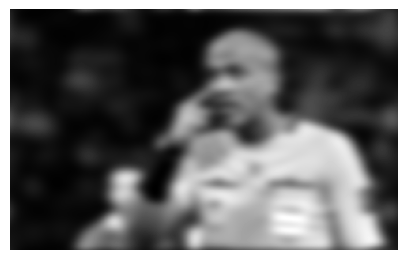

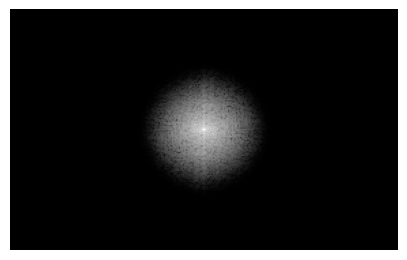

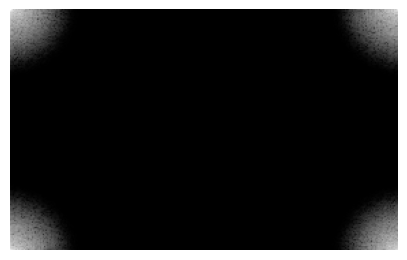

In [39]:
# Image Filters
Gshift = Fshift * H
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.figure(figsize=(5,5))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(G)), cmap='gray')
plt.axis('off')
plt.show()

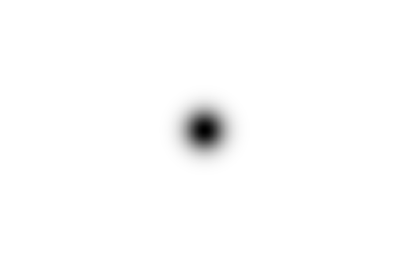

In [40]:
# Gaussian: High pass filter
HPF = 1 - H

plt.figure(figsize=(5,5))
plt.imshow(HPF, cmap='gray')
plt.axis('off')
plt.show()

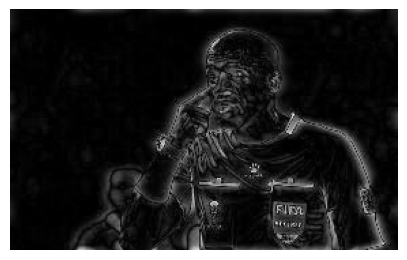

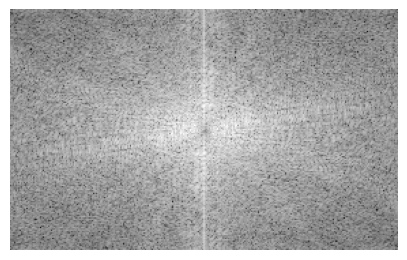

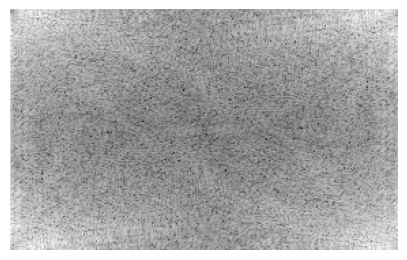

In [41]:
# Image Filters
Gshift = Fshift * HPF
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.figure(figsize=(5,5))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(G)), cmap='gray')
plt.axis('off')
plt.show()

## 8 Butterworth Filter.py

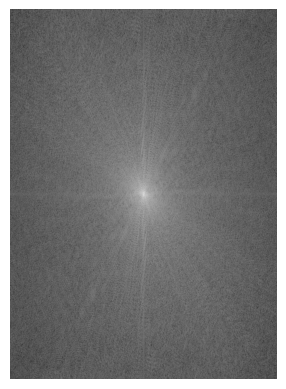

In [51]:
# Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# open the image
f = cv2.imread('mawar.jpg',0)

# transform image into freq. domain and shifted
F = np.fft.fft2(f)
Fshift = np.fft.fftshift(F)

plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')
plt.axis('off')
plt.show()

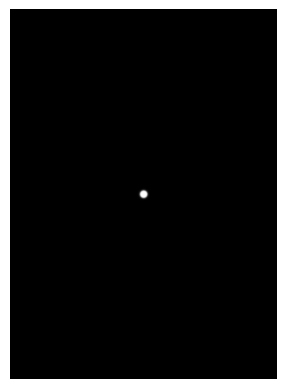

In [52]:
# Butterwort Low Pass Filter
M,N = f.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 10 # cut of frequency
n = 10 # order
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = 1 / (1 + (D/D0)**n)

plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

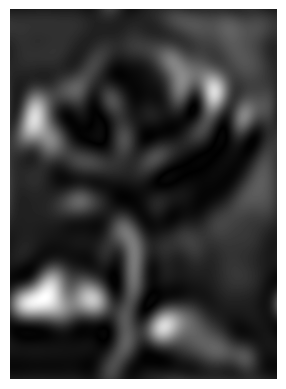

In [53]:
# frequency domain image filters
Gshift = Fshift * H
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

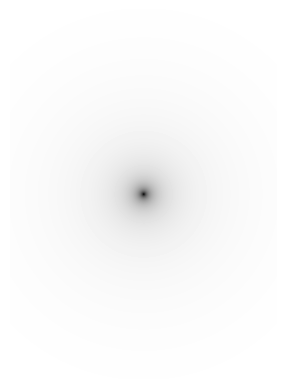

In [54]:
# Butterworth High Pass Filter
HPF = np.zeros((M,N), dtype=np.float32)
D0 = 10
n = 1
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        HPF[u,v] = 1 / (1 + (D0/D)**n)

plt.imshow(HPF, cmap='gray')
plt.axis('off')
plt.show()

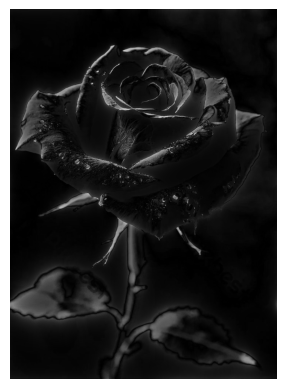

In [55]:
# frequency domain image filters
Gshift = Fshift * HPF
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

## 9 Frequency domain filter Laplacian Filter.py

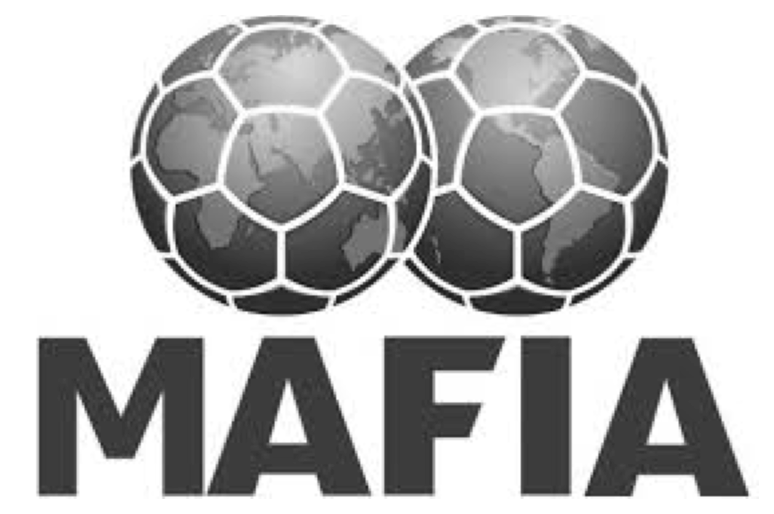

In [58]:
# Frequency domain filter: Laplacian filer
import cv2
import numpy as np
import matplotlib.pyplot as plt

# open and normalized the image
f = cv2.imread('MAFIA.jpg',0)
f = f / 255

plt.figure(dpi=150)
plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()

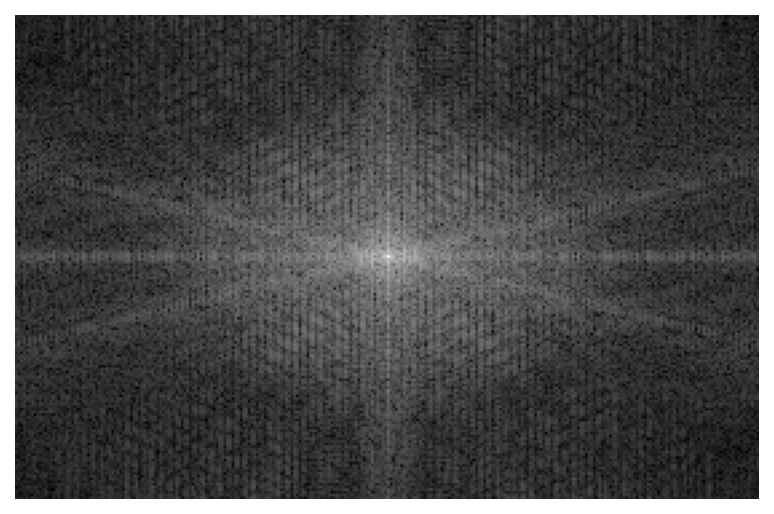

In [59]:
# transform into frequency domain
F = np.fft.fftshift(np.fft.fft2(f))

plt.figure(dpi=150)
plt.imshow(np.log1p(np.abs(F)), cmap='gray')
plt.axis('off')
plt.show()

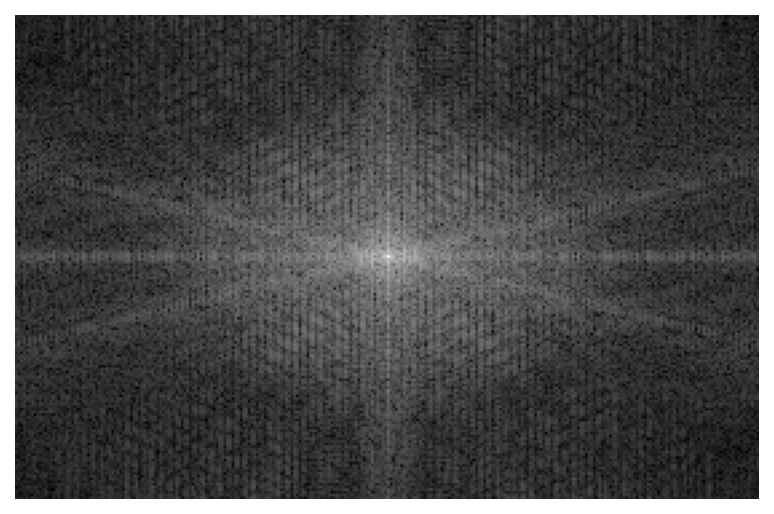

In [60]:
# transform into frequency domain
F = np.fft.fftshift(np.fft.fft2(f))

plt.figure(dpi=150)
plt.imshow(np.log1p(np.abs(F)), cmap='gray')
plt.axis('off')
plt.show()

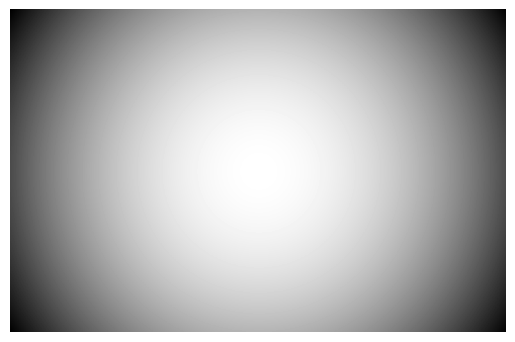

In [61]:
# Laplacian Filter
P,Q = F.shape
H = np.zeros((P,Q), dtype=np.float32)
for u in range(P):
    for v in range(Q):
        H[u,v] = -4*np.pi*np.pi*((u-P/2)**2 + (v-Q/2)**2)

plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

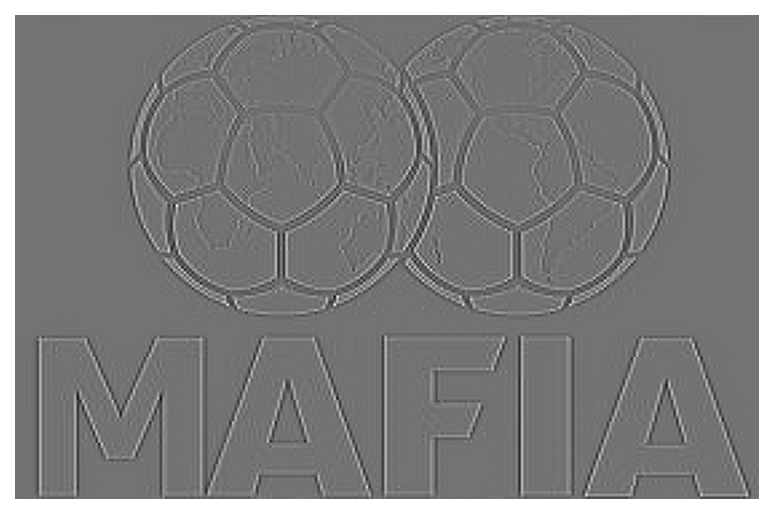

In [62]:
# Laplacian image
Lap = H * F
Lap = np.fft.ifftshift(Lap)
Lap = np.real(np.fft.ifft2(Lap))

# convert the Laplacian Image value into range [-1,1]
OldRange = np.max(Lap) - np.min(Lap)
NewRange = 1 - -1
LapScaled = (((Lap - np.min(Lap)) * NewRange) / OldRange) + -1

plt.figure(dpi=150)
plt.imshow(LapScaled, cmap='gray')
plt.axis('off')
plt.show()

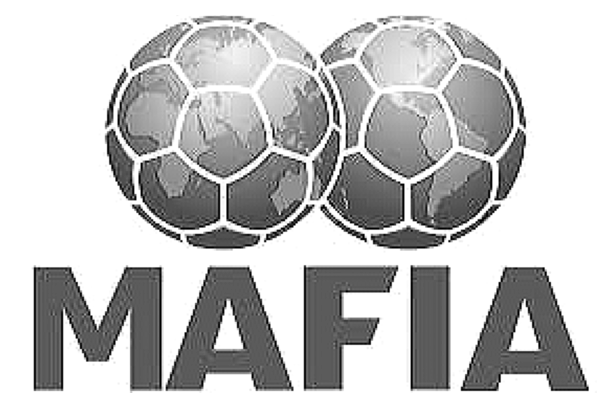

In [63]:
# image ehancement
c = -1
g = f + c*LapScaled
g = np.clip(g, 0, 1)

plt.figure(figsize=(5,7),dpi=150)
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()